# PHASE ONE

# Generate Text from one speech

In [43]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

# Load ascii text and covert to lowercase

In [44]:
filename = "input.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

# Create mapping of unique chars to integers

In [45]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [46]:
['\n', '\r', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', ':', ';', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xbb', '\xbf', '\xef']

['\n',
 '\r',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '»',
 '¿',
 'ï']

In [47]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  94058
Total Vocab:  58


# Prepare the dataset of input to output pairs encoded as integers

In [48]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  93958


# Reshape X to be [samples, time steps, features] ,  normalize and then one hot encode the output variable

In [49]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
X = X / float(n_vocab)
y = np_utils.to_categorical(dataY)

# Define the LSTM model

In [50]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Define the checkpoint

In [51]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [53]:
model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)


Epoch 1/10
93958/93958 [==============================] - 105s 1ms/step - loss: 2.9316

Epoch 00001: loss improved from inf to 2.93157, saving model to weights-improvement-01-2.9316.hdf5
Epoch 2/10
93958/93958 [==============================] - 117s 1ms/step - loss: 2.8063

Epoch 00002: loss improved from 2.93157 to 2.80630, saving model to weights-improvement-02-2.8063.hdf5
Epoch 3/10
93958/93958 [==============================] - 130s 1ms/step - loss: 2.7580

Epoch 00003: loss improved from 2.80630 to 2.75803, saving model to weights-improvement-03-2.7580.hdf5
Epoch 4/10
93958/93958 [==============================] - 135s 1ms/step - loss: 2.7224

Epoch 00004: loss improved from 2.75803 to 2.72240, saving model to weights-improvement-04-2.7224.hdf5
Epoch 5/10
93958/93958 [==============================] - 135s 1ms/step - loss: 2.6897

Epoch 00005: loss improved from 2.72240 to 2.68971, saving model to weights-improvement-05-2.6897.hdf5
Epoch 6/10
93958/93958 [=========================

# Load the network weights

In [54]:
filename = "weights-improvement-10-2.5654.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [55]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Pick a random seed and generate characters

In [56]:
import sys

start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write (result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Seed:
" .

i know that nes is a young school, but i speak to you today with deep respect for russia's timele "
 to te to toe toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to toe tor to the tore to the toree to to

# Phase 2

Load Larger LSTM network and generate text

In [7]:
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import sys

C:\Users\Tulika\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# COMPUTATIONS FOR AUTOMATIC GENERATION OF MODI'S SPEECH


# Load ascii text and covert to lowercase

In [8]:
filename = "modi.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

# Create mapping of unique chars to integers, and a reverse mapping

In [9]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Summarize the loaded data

In [10]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  89586
Total Vocab:  61


# Prepare the dataset of input to output pairs encoded as integers

In [11]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  89486


# reshape X to be [samples, time steps, features] ,  normalize an then one hot encode the output variable

In [12]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
X = X / float(n_vocab)
y = np_utils.to_categorical(dataY)

# Define the LSTM model

In [13]:
model = Sequential()
model.add(LSTM(600, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(600))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Define the checkpoint

In [14]:
#filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
filepath="weights-improvement-30-1.7416.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
#model.fit(X, y, epochs=10, batch_size=64, callbacks=callbacks_list)

Epoch 1/10
89486/89486 [==============================] - 821s 9ms/step - loss: 1.1836

Epoch 00001: loss improved from inf to 1.18359, saving model to weights-improvement-30-1.7416.hdf5
Epoch 2/10
89486/89486 [==============================] - 859s 10ms/step - loss: 1.1048

Epoch 00002: loss improved from 1.18359 to 1.10477, saving model to weights-improvement-30-1.7416.hdf5
Epoch 3/10
89486/89486 [==============================] - 856s 10ms/step - loss: 1.0350

Epoch 00003: loss improved from 1.10477 to 1.03504, saving model to weights-improvement-30-1.7416.hdf5
Epoch 4/10
89486/89486 [==============================] - 700s 8ms/step - loss: 0.9743

Epoch 00004: loss improved from 1.03504 to 0.97427, saving model to weights-improvement-30-1.7416.hdf5
Epoch 5/10
89486/89486 [==============================] - 726s 8ms/step - loss: 0.9099

Epoch 00005: loss improved from 0.97427 to 0.90995, saving model to weights-improvement-30-1.7416.hdf5
Epoch 6/10
89486/89486 [=======================

# load the network weights

In [19]:
filename = "weights-improvement-30-1.7416.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Pick a random seed and generate words using characters

In [20]:
start = numpy.random.randint(0, len(dataX)-1)
#print(start)
pattern = dataX[start]
#print(pattern)
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
for i in range(150):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Seed:
" k for connecting us with central asia, but today i feel satisfied to see an impossible task becoming "
 this projects that persons and also to ensure the patt man delivery and we have alro been able to complete even has becn a say tiat wou will be surpr
Done.


# Visualization of the loss

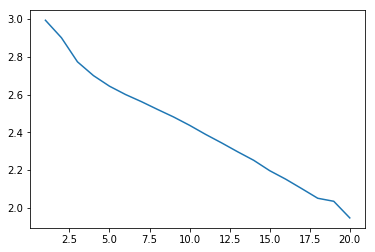

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
x_a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_a=[2.993,2.9004,2.773,2.700,2.644,2.60,2.562,2.521,2.4812,2.437,2.389,2.344,2.297,2.252,2.197,2.152,2.102,2.051,2.035,1.947]
fig = plt.figure()
ax = plt.axes()
ax.plot(x_a,y_a)

# COMPUTATIONS FOR AUTOMATIC GENERATION OF OBAMA'S SPEECH

# load ascii text and covert to lowercase

In [21]:
filename = "input.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

# Create mapping of unique chars to integers, and a reverse mapping

In [22]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Summarize the loaded data

In [23]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  94058
Total Vocab:  58


# Prepare the dataset of input to output pairs encoded as integers

In [25]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  93958


# Reshape X to be [samples, time steps, features] ,  normalize then one hot encode the output variable

In [26]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
X = X / float(n_vocab)
y = np_utils.to_categorical(dataY)

# Define the LSTM model

In [27]:
model = Sequential()
model.add(LSTM(600, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(600))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

# Define the checkpoint

In [ ]:
#filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
filepath="weights-improvement-10-1.7416.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Load the network weights

In [ ]:
#model.fit(X, y,epochs=20, batch_size=50, callbacks=callbacks_list)

In [29]:
filename = "weights-improvement-10-1.7416.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Pick a random seed and generate words using characters

In [30]:
start = numpy.random.randint(0, len(dataX)-1)
#print(start)
pattern = dataX[start]
#print(pattern)
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
for i in range(100):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Seed:
"  benefit even more -- and they'll continue to deny coverage to americans with pre-existing medical c "
onditions.  that's why i want to ask whether it is russian in andricans and russians in the west of 
Done.


# Visualization of the loss

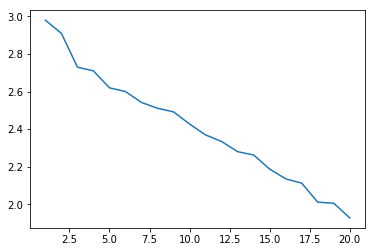

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
x_a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_a=[2.98,2.91,2.73,2.710,2.62,2.60,2.542,2.511,2.492,2.427,2.369,2.334,2.28,2.262,2.187,2.1352,2.112,2.011,2.005,1.927]
fig = plt.figure()
ax = plt.axes()
ax.plot(x_a,y_a)